In [118]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 
import missingno 

#voir geopandas pour transformer zip code (code postaux )

In [119]:
# Chargement du jeu de données
df = pd.read_csv('kc_house_data_test.csv', encoding='utf-8')

In [120]:
##affichage des informations
#affichage du type du jeu de données et des données
df.info()
#affichage des dimensions du jeu de données  
df.shape
#afficher le type des données manipulés
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [121]:
# Exploration des valeurs de notre jeu de données en fonction de différents outils numériques
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [122]:
#afficher les 5 premiers élements
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [123]:
#transformer les dates de manières propre
df['date'] = pd.to_datetime(df['date']).dt.date
df.columns = df.columns.str.strip().str.lower().str.replace('_', ' ')
df

,id,date,price,bedrooms,bathrooms,sqft living,sqft lot,floors,waterfront,view,...,grade,sqft above,sqft basement,yr built,yr renovated,zipcode,lat,long,sqft living15,sqft lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [124]:
#méthode pour vérifier si il y a des valeurs nuls
#df.isnull().count()
#df.isnull().sum()
#méthode pour rechercher les élements à valeurs nulles efficacements
df.isnull().sum().sort_values(ascending=False)

id               0
grade            0
sqft living15    0
long             0
lat              0
zipcode          0
yr renovated     0
yr built         0
sqft basement    0
sqft above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft lot         0
sqft living      0
bathrooms        0
bedrooms         0
price            0
sqft lot15       0
dtype: int64

In [125]:
#pour étudier la corrélation entre les données
df.corr()


,id,price,bedrooms,bathrooms,sqft living,sqft lot,floors,waterfront,view,condition,grade,sqft above,sqft basement,yr built,yr renovated,zipcode,lat,long,sqft living15,sqft lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [126]:
df['price'].corr(df['zipcode'])

-0.053202854298325664

In [127]:
"""
kings_county = df
fig, ax = plt.subplots(figsize = (15,15))
fig.set_size_inches(10,10)
plt.scatter(...,ax=ax)
ax.set_title('King County',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})
plt.show()
"""

"\nkings_county = df\nfig, ax = plt.subplots(figsize = (15,15))\nfig.set_size_inches(10,10)\nplt.scatter(...,ax=ax)\nax.set_title('King County',fontdict = {'fontsize': 30})\nax.set_ylabel('Latitude',fontdict = {'fontsize': 20})\nax.set_xlabel('Longitude',fontdict = {'fontsize': 20})\nplt.show()\n"

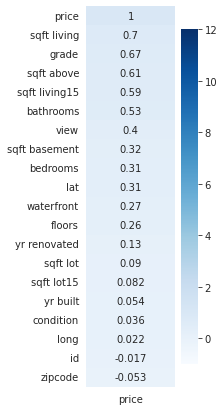

In [128]:
plt.figure(figsize = (2,7))
heatmap =sns.heatmap(df.corr()[["price"]].sort_values(by="price",ascending=False),vmin=-1,vmax=12,annot=True,cmap="Blues")

<AxesSubplot:>

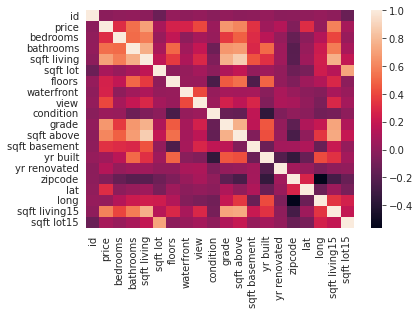

In [129]:
sns.heatmap(df.corr())

In [130]:
mask = np.zeros_like(df.corr())

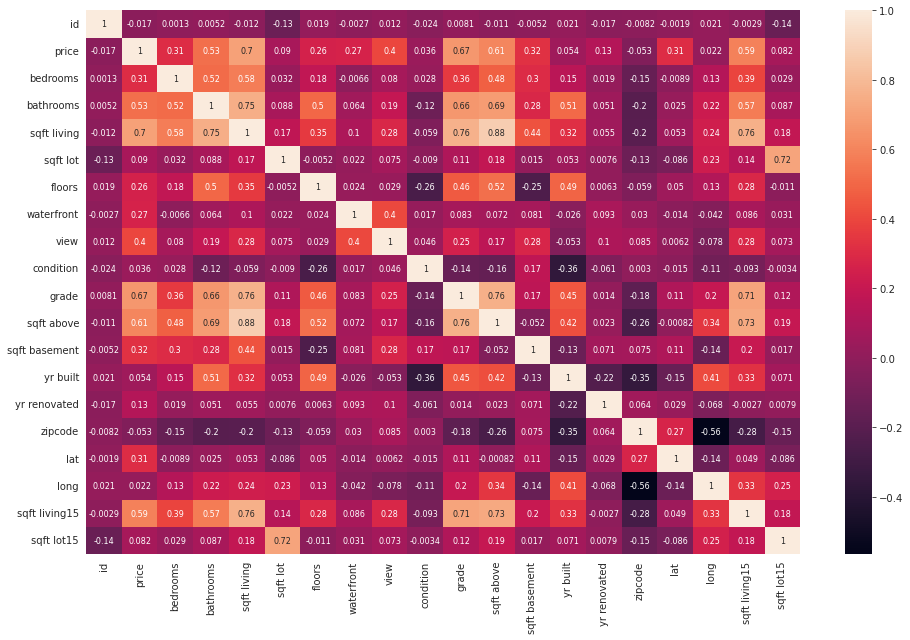

In [131]:
#méthode pour visualiser la corrélation entre les différentes 
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),mask=mask,annot =True , annot_kws={"size":8})
sns.set_style("white")
plt.savefig("corr.png")

In [132]:
df["zipcode"]=df["zipcode"].astype("object")
df_dummies =pd.get_dummies(df)
df_dummies


/home/sahboun/miniconda3/envs/osp/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,id,price,bedrooms,bathrooms,sqft living,sqft lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,1,0,0,0,0,0,0,0,0,0
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df.duplicated()
#pour voir si il y a des données dupliquées
print(df.duplicated().value_counts())
print(df.count())

False    21613
dtype: int64
id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft living      21613
sqft lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft above       21613
sqft basement    21613
yr built         21613
yr renovated     21613
zipcode          21613
lat              21613
long             21613
sqft living15    21613
sqft lot15       21613
dtype: int64


In [134]:
df_dummies_2 =df_dummies.corrwith(df["price"])
df_dummies_2

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft living      0.702035
                   ...   
zipcode_98177    0.040507
zipcode_98178   -0.069242
zipcode_98188   -0.054409
zipcode_98198   -0.074025
zipcode_98199    0.083659
Length: 461, dtype: float64

In [135]:
#voir valeur abberantes
#exemple 33 chambres qui ne matche pas 
#vérifier le types des variables
df["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [136]:
#verifier la maison bizarre
df_test = df[df["bedrooms"]==33]
df_test

,id,date,price,bedrooms,bathrooms,sqft living,sqft lot,floors,waterfront,view,...,grade,sqft above,sqft basement,yr built,yr renovated,zipcode,lat,long,sqft living15,sqft lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [137]:
df['date'].sort_values().unique()

array([datetime.date(2014, 5, 2), datetime.date(2014, 5, 3),
       datetime.date(2014, 5, 4), datetime.date(2014, 5, 5),
       datetime.date(2014, 5, 6), datetime.date(2014, 5, 7),
       datetime.date(2014, 5, 8), datetime.date(2014, 5, 9),
       datetime.date(2014, 5, 10), datetime.date(2014, 5, 11),
       datetime.date(2014, 5, 12), datetime.date(2014, 5, 13),
       datetime.date(2014, 5, 14), datetime.date(2014, 5, 15),
       datetime.date(2014, 5, 16), datetime.date(2014, 5, 17),
       datetime.date(2014, 5, 18), datetime.date(2014, 5, 19),
       datetime.date(2014, 5, 20), datetime.date(2014, 5, 21),
       datetime.date(2014, 5, 22), datetime.date(2014, 5, 23),
       datetime.date(2014, 5, 24), datetime.date(2014, 5, 25),
       datetime.date(2014, 5, 26), datetime.date(2014, 5, 27),
       datetime.date(2014, 5, 28), datetime.date(2014, 5, 29),
       datetime.date(2014, 5, 30), datetime.date(2014, 5, 31),
       datetime.date(2014, 6, 1), datetime.date(2014, 6, 2),
  

In [138]:
df_test = df[df["bedrooms"]!=33].drop("date", axis=1, inplace=False)
#df_test["bedrooms"].sort_values(ascending=False)
df_test

,id,price,bedrooms,bathrooms,sqft living,sqft lot,floors,waterfront,view,condition,grade,sqft above,sqft basement,yr built,yr renovated,zipcode,lat,long,sqft living15,sqft lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



x = df_test.drop("price", axis=1, inplace=False)
y = df_test["price"]


xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1)

linreg = LinearRegression()
linreg.fit(xtrain, ytrain)

ypred_train = linreg.predict(xtrain)
ypred_test = linreg.predict(xtest)

#sans changement sur la base de données


linreg.fit(xtrain, ytrain)
print(linreg.score(xtrain, ytrain))

0.6997763182180349


In [141]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier



x = df_test.drop("price", axis=1, inplace=False)
y = df_test["price"]

selector=SelectFromModel(SGDClassifier(random_state=0),threshold="mean")
selector.fit_transform(x,y)




array([[7129300520],
       [6414100192],
       [5631500400],
       ...,
       [1523300141],
       [291310100],
       [1523300157]], dtype=object)

In [142]:
selector.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [143]:
selector.estimator_.coef_

array([[-2.95035027e+07, -7.12947523e-01, -7.09646840e-01, ...,
        -1.43705003e+01, -7.47274626e+01,  1.60884530e+04],
       [-7.84162476e+06,  9.10177712e-01,  4.53838612e-01, ...,
        -5.59546351e+01,  7.78176939e+02,  4.78359150e+03],
       [-8.07591860e+07, -2.37834106e+00, -1.43719753e+00, ...,
         4.66805018e+01, -1.14971725e+03, -5.81717760e+03],
       ...,
       [-9.82681762e+07, -3.84847033e-01,  1.50571402e+00, ...,
         5.87668731e+01,  2.55538430e+02,  7.08120465e+03],
       [-2.61366126e+07, -1.27060583e+00, -7.21935133e-02, ...,
         7.05627196e+01, -3.16308659e+02, -5.68967185e+03],
       [-4.34552314e+07,  7.23790692e-01,  2.44471856e+00, ...,
         1.50047662e+01,  6.35657625e+02, -1.11864161e+03]])